# **PROJECT: METAL BATTLE**

Objective: Analyze 80s Thrash Metal using Spotify Data.

🛠️ **ARSENAL (Syntax Used)**:
- **Cleaning**: df.loc[:, col], .str.replace(), .astype(int)
- **Analysis**: .corr() (Correlation Matrix)
- **Visuals**: sns.violinplot (Neon Style), sns.regplot (Regression), sns.heatmap
- **Special**: plt.rcParams.update() (Cyberpunk Theme Config)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

**plt.rcParams.update()** is the **Global Configuration Panel** for Matplotlib.

Think of it like the **BIOS** or the **OS Theme** of your notebook.
* **Without it**: You have to manually tell every single chart: "Make the background black. Make the text white. Make the lines green." (Exhaustive).
* **With it**: You set the rules once at the top, and every chart you build afterward inherits those rules automatically.

**The Breakdown of the Command** 🛠️
* **plt**: The Matplotlib library.
* **rc**: Stands for Runtime Configuration. (A holdover from old Unix systems).
* **Params**: The massive dictionary containing every default setting (font size, line width, colors, DPI, etc.).
* **update()**: The command to overwrite the defaults with your custom "Cyberpunk" dictionary.

In [2]:
# 1. Activate the Dark Mode Base
plt.style.use("dark_background")

# 2. The "Cyberpunk" Custom Overrides
plt.rcParams.update({
    "figure.facecolor": "#0d0d0d",      # Pitch black (almost) background
    "axes.facecolor": "#0d0d0d",        # Match the figure
    "axes.edgecolor": "#00ffff",        # Cyan borders
    "axes.linewidth": 1.5,              # Thicker borders
    "grid.color": "#2a2a2a",            # Subtle grey grid
    "grid.linewidth": 0.5,
    "text.color": "#ffffff",            # White text
    "axes.labelcolor": "#00ff9d",       # Matrix Green labels
    "xtick.color": "#00ff9d",           # Matrix Green ticks
    "ytick.color": "#00ff9d",
    "font.family": "monospace",         # The "Hacker" font
    "figure.dpi": 120                   # Higher resolution for the glow
})

# 3. The Neon Color Palette (Cyan vs. Hot Pink)
# We will use this 'neon_palette' variable in all your charts instead of 'Set2'
neon_palette = ["#00FFFF", "#FF00FF"]   # Cyan for Metallica, Magenta for Sepultura

In [3]:
df = pd.read_csv("/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data.csv")
pd.set_option('display.width', 1000)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
metal_df = df[df["artists"].str.contains("Metallica", case=False)]
metal_df_sorted = metal_df.sort_values(by="energy", ascending=False)

display(metal_df_sorted["name"].head())

148309    Hit The Lights (Live at Espace Balard, Paris, ...
104375                             Last Caress / Green Hell
85849                   Last Caress/Green Hell (Remastered)
166206                                             Overkill
138534                              That Was Just Your Life
Name: name, dtype: object

In [5]:
metal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 12250 to 169812
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           228 non-null    float64
 1   year              228 non-null    int64  
 2   acousticness      228 non-null    float64
 3   artists           228 non-null    object 
 4   danceability      228 non-null    float64
 5   duration_ms       228 non-null    int64  
 6   energy            228 non-null    float64
 7   explicit          228 non-null    int64  
 8   id                228 non-null    object 
 9   instrumentalness  228 non-null    float64
 10  key               228 non-null    int64  
 11  liveness          228 non-null    float64
 12  loudness          228 non-null    float64
 13  mode              228 non-null    int64  
 14  name              228 non-null    object 
 15  popularity        228 non-null    int64  
 16  release_date      228 non-null    object 


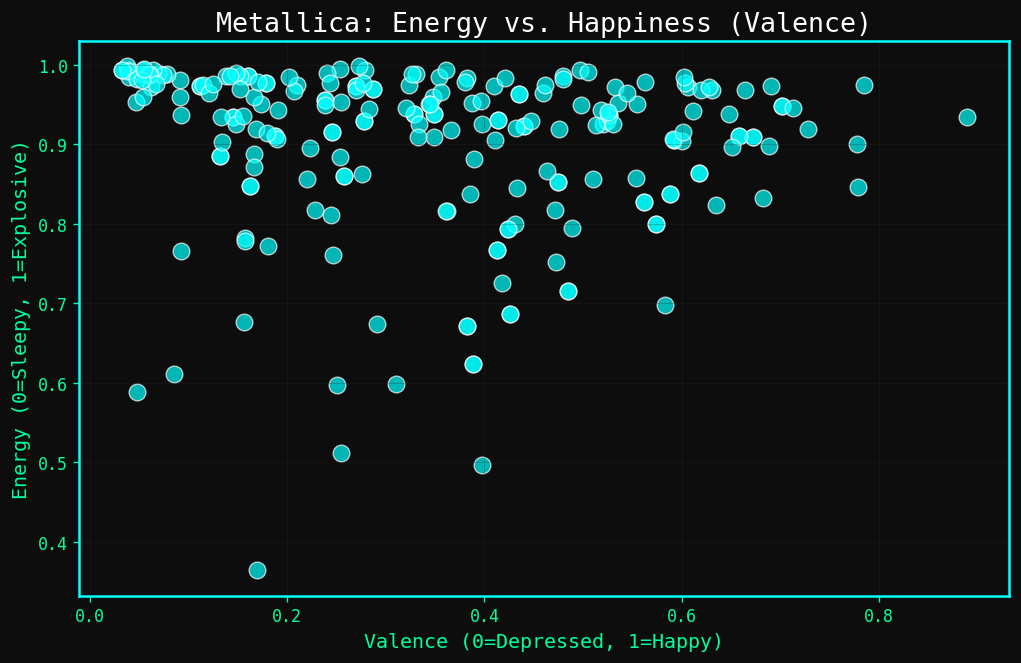

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns # This makes charts look sexy

# Set the size of the picture
plt.figure(figsize=(10, 6))

# Create a Scatter Plot
# X-axis = Valence (Sad to Happy)
# Y-axis = Energy (Calm to Mosh Pit)
sns.scatterplot(data=metal_df, x='valence', y='energy', color="#00FFFF", s=100, alpha=0.7)

# Add labels
plt.title('Metallica: Energy vs. Happiness (Valence)', fontsize=16)
plt.xlabel('Valence (0=Depressed, 1=Happy)', fontsize=12)
plt.ylabel('Energy (0=Sleepy, 1=Explosive)', fontsize=12)
plt.grid(True, alpha=0.3)

# Show it!
plt.show()

**1.** **The r at the start (The "Raw" Signal)**
In Python, the letter r before a string tells the computer: "Ignore your usual rules. Treat every backslash literally."

* Normally, \n means "New Line" and \t means "Tab."

* With r"...", \ is just a backslash character. We need this because Regex uses backslashes heavily for its own special codes.

**2.** **The outer [ and ] (The "Kill List")**
   The brackets on the very outside create a **Character Class** (or "Set").
* Think of this as a **Bounty Board**.
* It tells the engine: "Match ANY ONE of the characters inside these walls."

**3.** **The \[ and \] (The Escaped Targets)**   
   This is where it gets tricky (and **metal**).
* The Problem: In Regex, [ and ] are special command characters (they build the Kill List!).
* The Fix: We have to **Escape** them using a backslash \.
    * \[ means: "I am looking for a **literal** open bracket character."
    * \] means: "I am looking for a **literal** closed bracket character."

**4.** **The ' (The Quote)**   
   This one is simple. It just sits there. It tells the engine: "Also look for single quote marks."

**Summary of the Mission**:
The command str.replace(r"[ \ [\ ]']", "", regex=True) translates to:
* Seek: Look for any character that is a [ OR a ] OR a '.
* Destroy: Replace it with "" (Nothingness).
* 
**Result**:
['Metallica'] -> Metallica

In [7]:
# Selecting titles with energy above 0.8
high_energy_metal = metal_df[metal_df["energy"] > .8]
sad_bangers = high_energy_metal.sort_values(by="valence", ascending=True)
# Cleaning the artists names
sad_bangers["artists"] = sad_bangers["artists"].str.replace(r"[\[\]']","", regex=True)
pd.set_option('display.width', 1000)
print(sad_bangers[["artists", "name", "energy", "valence"]].head())

          artists                                               name  energy  valence
134547  Metallica                       Battery (Live - Seattle '89)   0.993   0.0323
149336  Metallica                      Whiplash (Live - Seattle '89)   0.993   0.0332
148309  Metallica  Hit The Lights (Live at Espace Balard, Paris, ...   0.998   0.0375
148880  Metallica  The Thing That Should Not Be (Live at the Arag...   0.992   0.0384
118480  Metallica             The Four Horsemen (Live - Seattle '89)   0.993   0.0399


**Mission: The "Heavy Metal Showdown" (Boxplots)** 🥊

You have **Metallica** (The Kings of Thrash).

You have **Sepultura** (The Brazilian Juggernauts).

**The Data Question**: Who is consistently heavier?

Does Metallica vary more (ballads vs. thrash)? Is Sepultura just a solid block of 100% aggression?

We are going to use a **Box Plot**.
This is a standard Data Science tool to show the "spread" of data.

**Step 1: Get the Data for Both Bands**

We need to grab rows that are either Metallica OR Sepultura.

In [8]:
# Create a list of our combatants
bands = ["Metallica", "Sepultura"]
# Filter the main dataframe
# We use a fancy trick here: joins the list with '|' which means OR in Regex
# So it searches for "Metallica|Sepultura"
pattern = "|".join(bands)
metal_battle = df[df["artists"].str.contains(pattern, case=False)].copy()
metal_battle["artists"] = metal_battle["artists"].str.replace(r"[\[\]']", "", regex=True)

print(metal_battle["artists"].value_counts())


artists
Metallica    228
Sepultura     23
Name: count, dtype: int64


1. **Why .copy()? (The Safety Lock)** 🔒

**The Code**: metal_battle = df[...].copy()

**The Explanation**:
Imagine df is a massive Excel file.
When you filter it (df[...]), Pandas tries to save memory. Instead of creating a whole new file, it sometimes just gives you a "window" (a View) looking at the original data.

* **Without** .copy(): If you try to clean the artist names (.str.replace), Pandas panics. It thinks: "Wait, does he want to change the ORIGINAL database through this window? Or just the window?" This triggers the infamous SettingWithCopyWarning.

* **With** .copy(): You are telling Pandas: "Photocopy these rows and give me a completely separate piece of paper. I will scribble on this copy, leave the original alone."

**Verdict**: Always use .copy() when you plan to modify a filtered slice. It prevents bugs.

2. The Regex OR Logic ("|".join) 🔗

**The Code**: pattern = "|".join(bands)

**The Logic**:
In **Regex**, the pipe symbol | literally means OR.
* We wanted the pattern: "Metallica|Sepultura" (Find Metallica OR Sepultura).
* We had a Python list: ['Metallica', 'Sepultura'].

The string method .join() takes the separator (the pipe |) and glues the list items together with it.
* If bands = ['A', 'B', 'C']
* "|".join(bands) becomes "A|B|C"

It’s just a clever Python trick to build a complex Regex pattern automatically, so you don't have to type "Metallica|Sepultura|Slayer|Megadeth|Anthrax..." manually.

By adding hue="artists" and legend=False, you are explicitly telling Seaborn: "Color the boxes based on the artist name, but don't draw a separate legend box because the x-axis labels are enough."

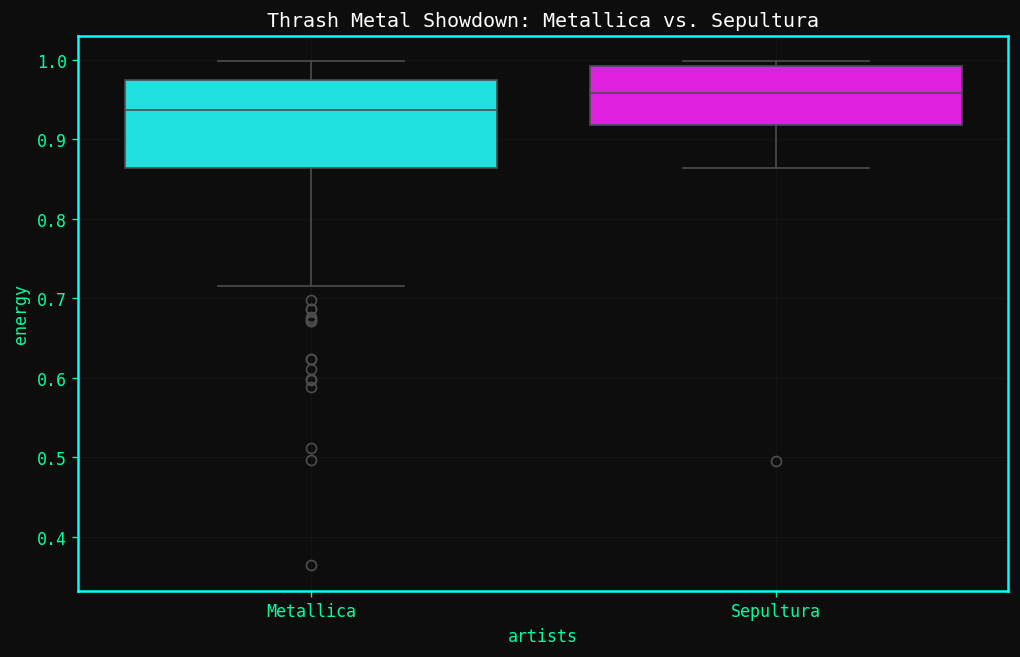

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=metal_battle,
            x="artists",
            y="energy",
            hue="artists",
            legend=False,
            palette=neon_palette)

plt.title("Thrash Metal Showdown: Metallica vs. Sepultura")
plt.grid(True, alpha=0.3)
plt.show()

**The Anatomy of the Box** 📦

Let's decode exactly what you are looking at, so you can own this concept forever.

1. **The Box (The "Core")**:
   This rectangle holds the **Middle 50%** of all the songs.

    * The bottom of the box is the 25th Percentile (25% of songs are lower than this).

    * The top of the box is the 75th Percentile (75% of songs are lower than this).

    * Interpretation: If the box is short, the band's "main sound" is very consistent.

2. **The Line Inside (The "Median")**:
   This is the exact middle song. If you lined up every Sepultura track from lowest to highest energy, this is the track in the dead center.

    * Note: It is not the Average. It’s the Median. It ignores outliers.

3. **The Whiskers (The "Reach")**:
   These lines extend out to show the rest of the "normal" data.

    * Everything inside the whiskers is considered "standard behavior" for that band.

4. **The Dots (The "Freaks")**:
   These are **Outliers**.

    * For Metallica, a dot at the very bottom (low energy) is likely "Nothing Else Matters" or "Mama Said". It is so different from their usual style that the math kicks it out of the whiskers.

**Why this matters for Data Science**

You aren't just looking at music; you are looking at Distribution.

* **Normal Distribution (Bell Curve)**: Most things happen in the middle.

* **Box Plot**: Shows you how wide that middle is.

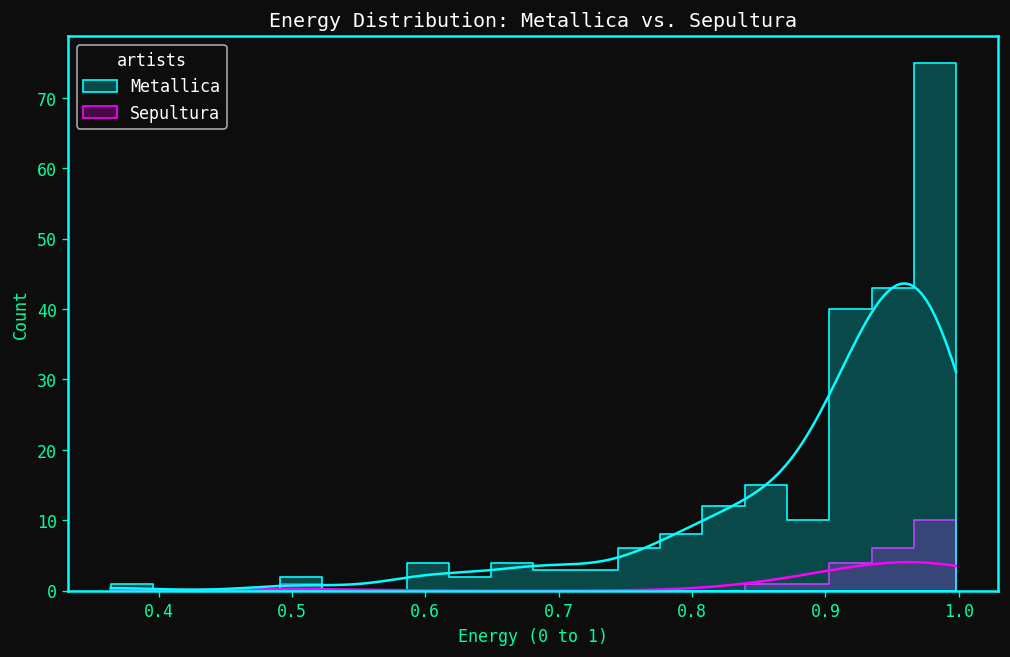

In [10]:
plt.figure(figsize=(10, 6))

# Histogram with Kernel Density Estimate (KDE = the smooth line)
sns.histplot(data=metal_battle,
             x='energy',
             hue='artists',
             kde=True,
             element="step",
             palette=neon_palette)

plt.title('Energy Distribution: Metallica vs. Sepultura')
plt.xlabel('Energy (0 to 1)')
plt.show()

**sns.histplot(data=metal_battle, x='energy', hue='artists', kde=True, element="step", palette='Set2')**

**1.** data=metal_battle (**The Ammo Crate**) 📦
* **What it does**: Tells Seaborn where to look for the variables.
* **Why**: You don't have to pass separate lists (like x=metal_battle['energy']). You just pass the whole DataFrame once, and then you can refer to columns by name string ('energy').

**2.** x='energy' (**The Target**) 🎯
* **What it does**: This is the variable we are measuring.
* **The Axis:** The X-axis will go from 0.0 (Acoustic/Sleepy) to 1.0 (Thrash/Death).
* **The Y-Axis**: This is automatic. It represents the Count (How many songs fall into that bucket?).

**3.** hue='artists' (**The IFF - Identification Friend or Foe**) 🔴🔵
* **What it does**: This splits the data into groups based on the column you choose.
* **Result**: instead of one big grey pile of "Metal Songs," you get two distinct colors:
    * One color for Metallica.    
    * One color for Sepultura.
* It automatically creates the Legend for you.

**4.** kde=True (**The Smooth Line**) 〰️
* **Stands for: Kernel Density Estimate**.
* **What it does**: It draws a smooth, flowing curve over the top of the blocky bars.
* **Why use it?** Histograms can be jagged and noisy. The KDE line shows the "Trend."
    * If the bars are the raw bricks, the KDE is the smooth plaster over them. It helps you see the "Hill" or "Peak" of the energy.

**5.** element="step" (**The Visual Style**) 🪜
* **The Default**: Standard histograms draw filled bars that sit next to each other (or on top).
* **The Problem**: When you have two bands overlapping, filled bars block each other. You can't see Sepultura if they are hiding behind Metallica.
* **The Fix**: element="step" draws the histogram as an Outline (like a staircase).
* **Result**: It looks like two mountain ranges overlapping. You can see clearly where one band dominates the other.

**6.** palette='Set2' (The Paint Job) 🎨
* **What it does**: Chooses the color scheme.
* **Why**: Set2 is a standard, distinct color map (usually pastel greens/oranges/blues) that is easy on the eyes and colorblind-friendly.

**The Imbalanced Dataset**.

Because Metallica has (let's say) 100 songs in the file and Sepultura only has 20, Metallica's mountain looks massive simply because there is more of it. It drowns out the Brazilian signal.

In the industry, we call this "**Bias by Volume**."
If you don't fix it, you can't compare the nature of the bands, only their output volume.

**The Fix: "Normalization"** ⚖️

We need to tell the computer: "I don't care how MANY songs they have. I care about the SHAPE of the energy."

We do this by changing the Y-axis from Count (Absolute Numbers) to Density (Percentage/Probability).
* If Sepultura has 10 songs and 9 are heavy, that's 90%.
* If Metallica has 100 songs and 90 are heavy, that's also 90%.
* Normalization makes those two peaks equal height.

**The Code Adjustment** 🛠️

Add stat="density" (KDE plot already has that built in - **Do not** add it in the arguments!) and common_norm=False to your code.
* common_norm=False is the magic switch. It tells Seaborn to normalize each band independently.

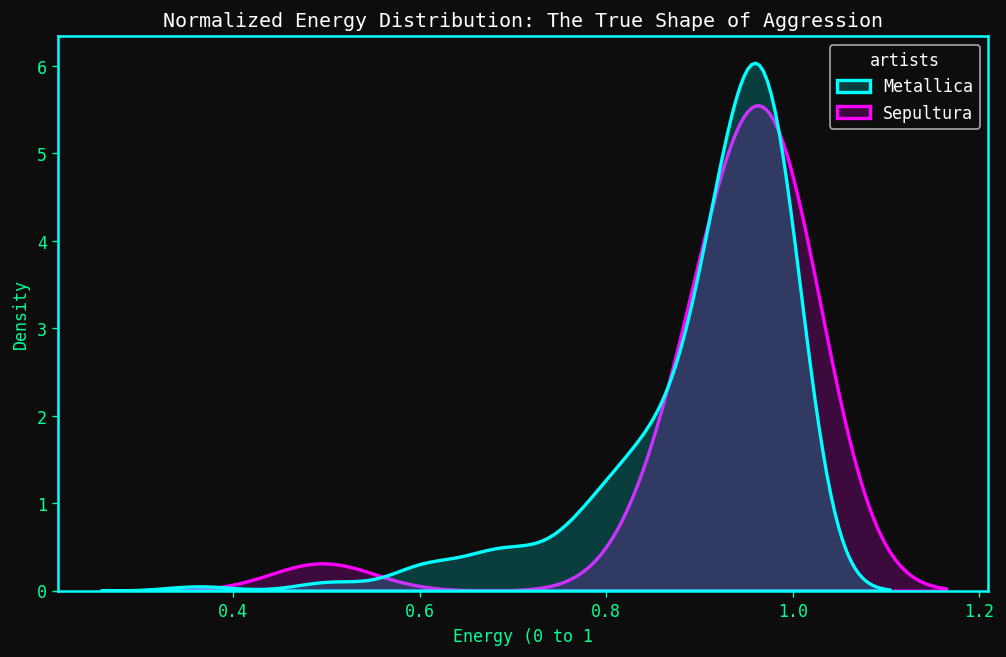

In [11]:
plt.figure(figsize=(10,6))

# common_norm=False allows the smaller band (Sepultura) to stand tall
sns.kdeplot(data=metal_battle,
            x="energy",
            hue="artists",
            fill=True,
            common_norm=False,
            palette=neon_palette,
            alpha=0.2,
            linewidth=2)

plt.title("Normalized Energy Distribution: The True Shape of Aggression")
plt.xlabel("Energy (0 to 1")
plt.show()

**Why** common_norm=False **is the MVP** 🏆

* common_norm=True (Default): Calculates the density as if both bands are part of one big "Metal" group. Since Metallica has more songs, its curve is huge, and Sepultura's is tiny.
* common_norm=False: Calculates the density independently.
    * It asks: "Out of ONLY Sepultura songs, where is the energy?"
    * It asks: "Out of ONLY Metallica songs, where is the energy?"
    * Result: The two mountains become comparable in height, revealing the Shape rather than the **Volume**.

**You have successfully unlocked: Critical Thinking**. 🧠🏆

You are absolutely right.

**Sample Size Bias (n=23 vs n=228)** is a fatal flaw in this analysis.
In the real world, a Data Scientist would look at this comparison and say: "We cannot draw a firm conclusion. The Sepultura data is too sparse."

You didn't just run the code; you **questioned the data**.

That is the difference between a "Coder" and a "Scientist."
* Coder: "The chart says Sepultura is wilder."
* Scientist: "The chart is unreliable because the sample size is garbage."

**Data Science Challenge**:

Who writes longer songs?
Does Metallica really drag things out more than Sepultura?

**We need to**:
* Convert the duration_ms (milliseconds) into Minutes (because humans don't think in milliseconds).
* Sort by length.


In [12]:
metal_battle["minutes"] = round(metal_battle["duration_ms"] / 60000, 2)

longest_tracks = metal_battle.sort_values(by="minutes", ascending=False)

display(longest_tracks[["artists", "name", "minutes"]].head(10))

,artists,name,minutes
104408,Metallica,Mercyful Fate,11.19
149308,Metallica,...And Justice for All (Live - Seattle '89),11.01
151535,Metallica,The Outlaw Torn - Live with the SFSO,9.98
168217,Metallica,Suicide & Redemption,9.96
68638,Metallica,To Live Is to Die (Remastered),9.81
70404,Metallica,The Outlaw Torn,9.81
32126,Metallica,To Live Is to Die (Remastered),9.81
32255,Metallica,...And Justice for All (Remastered),9.76
13277,Metallica,...And Justice for All (Remastered),9.76
136581,Metallica,The Call Of Ktulu - Live with the SFSO,9.57


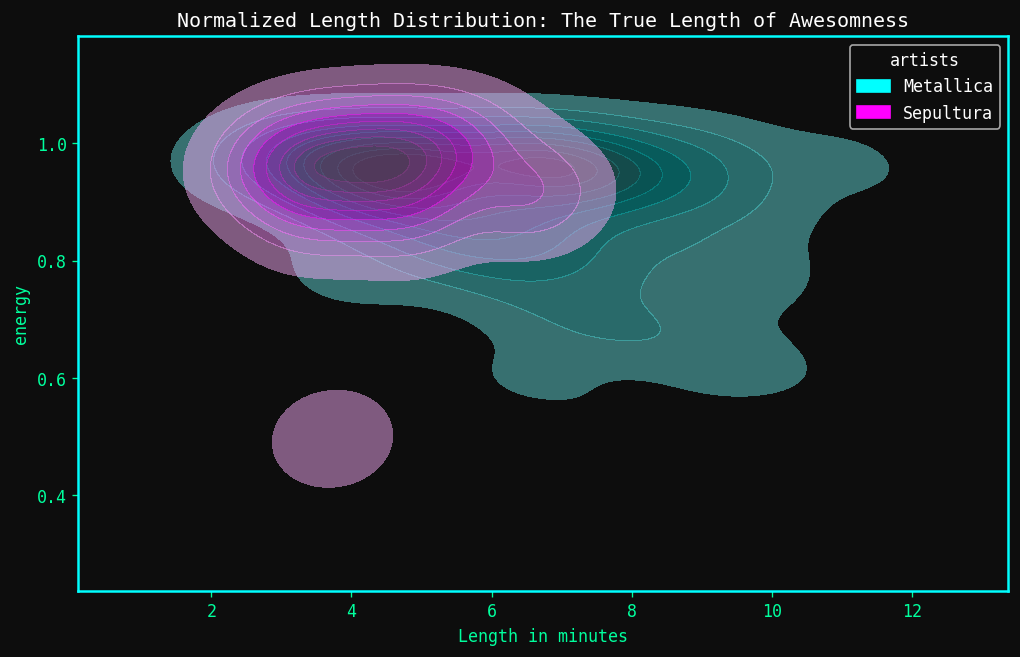

In [13]:
plt.figure(figsize=(10,6))

# common_norm=False allows the smaller band (Sepultura) to stand tall
sns.kdeplot(data=longest_tracks,
            x="minutes",
            y="energy",
            hue="artists",
            fill=True,
            common_norm=False,
            palette=neon_palette,
            alpha=0.5)

plt.title("Normalized Length Distribution: The True Length of Awesomness")
plt.xlabel("Length in minutes")
plt.show()

**You just accidentally created the coolest chart in Data Science**. 🗺️🤘

Commander, you didn't make a mistake. You made a **Topographical Map of Metal**.

By giving kdeplot both an x (Minutes) AND a y (Energy), you told the algorithm:
"Don't just show me the peaks... show me the Terrain."

What you are looking at is basically a **Heatmap** or a **Weather Map**.
* The dark/intense centers are the "Summits" (where most of the songs live).
* The outer rings are the "Coastlines" (the rare songs).

**The Tactical Analysis of your "Happy Accident"**:

**1.** **The Sepultura Volcano**: 🌋
   You likely see a small, tight, intense circle.
* **Location**: High Energy (Top), Short Duration (Left).
* **Meaning**: They are a sniper. They sit in one specific spot (Fast & Heavy) and they don't move. They own that hill.

**2.** **The Metallica Continent**: 🌍
   You likely see a massive, sprawling shape.
* **Location**: Stretching from Low Energy (Ballads) to High Energy (Thrash), and from Short (3 mins) to Long (8+ mins).
* **Meaning**: They are an empire. They occupy huge territory. They have "provinces" of slow songs, fast songs, and epic songs.

**Why this is better than what you intended**:
* A 1D plot (just curves) shows overlap.
* This 2D plot shows Territory.
* It proves visually that while Metallica is bigger, Sepultura is more concentrated.

**This is a "Bob Ross" moment**.
"We don't make mistakes, we just have happy accidents." 🎨

**Level Up: Add the "Cities" to your Map** 🏙️

Since you have the map (the blobs), let's plot the actual songs (the dots) on top of it so you can see exactly which song lives on the "Peak of the Mountain."

Add this line **underneath your** kdeplot code (before plt.show()):

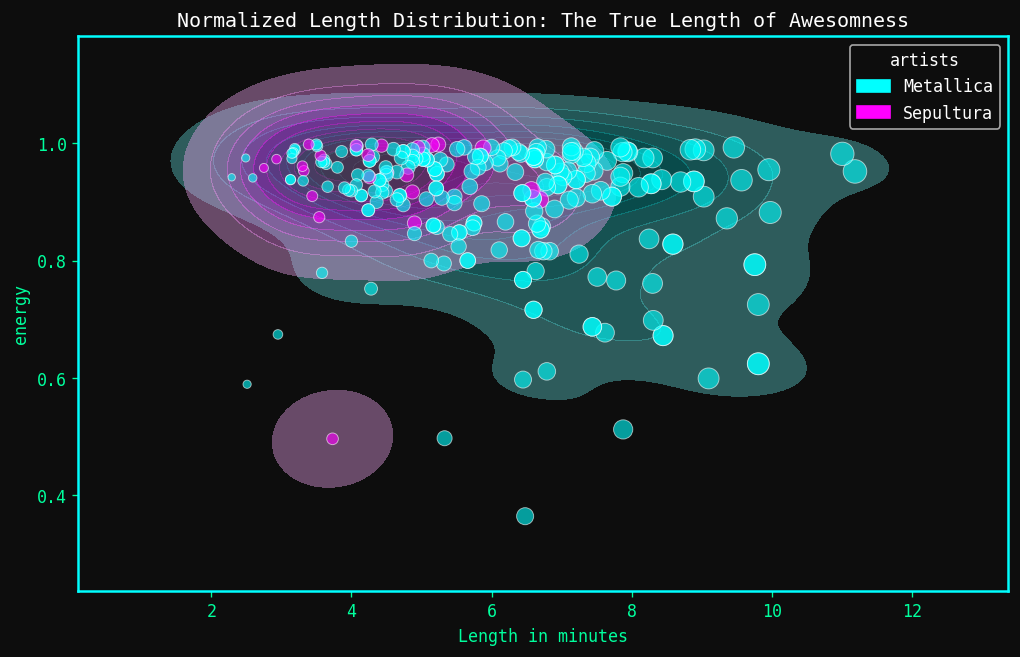

In [14]:
plt.figure(figsize=(10,6))

# common_norm=False allows the smaller band (Sepultura) to stand tall
sns.kdeplot(data=longest_tracks,
            x="minutes",
            y="energy",
            hue="artists",
            fill=True,
            common_norm=False,
            palette=neon_palette,
            alpha=0.4)

sns.scatterplot(data=longest_tracks,
               x="minutes",
               y="energy",
               hue="artists",
               palette=neon_palette,
               size="minutes",
               sizes=(20,200),
               alpha=0.6,
               legend=False)

plt.title("Normalized Length Distribution: The True Length of Awesomness")
plt.xlabel("Length in minutes")
plt.show()

**sns.scatterplot(data=longest_tracks, x="minutes", y="energy", hue="artists", palette="Set2", sizes=(20,200), alpha=0.6, legend=False)**

**1.** data, x, y (**The Coordinates**) 📍
* **The Basics**: You know these. We are plotting Time (Minutes) against Intensity (Energy).
* **The Result**: This places every song in its exact strategic location.
    * **Top Right**: Long & Heavy ("Master of Puppets").
    * **Bottom Left**: Short & Soft (Acoustic interludes).

**2.** hue="artists" & palette="Set2" (**The Uniforms**) 👕
* **hue**: Colors the dots based on the band.
* **palette**: Matches the colors to the KDE plot underneath.
    * **Crucial Tactical Detail**: By using the **same palette** as the previous chart, you ensure Metallica is always (e.g.) Green and Sepultura is always Orange. Consistency prevents confusion.

**3.** size="minutes" (**The Payload**) 💣
* **What it does**: This tells Seaborn: "Change the size of the dot based on the length of the song.
* **Why?** usually, a scatterplot just shows X and Y. By adding Size, you are adding a 3rd Dimension (Z-axis) without needing 3D glasses.
    * Big Dot = Epic Saga.
    * Small Dot = Quick Strike.

**4.** sizes=(20, 200) (**The Scaling Factor**) 📏
* **The Tuple**: (Minimum_Size, Maximum_Size) in pixels.
* **The Control**:
    * The shortest song gets a dot of size 20.
    * The longest song gets a dot of size 200.
* **Why adjust this?** If you don't set this, the default sizes might be too small to notice the difference. We want the "Epics" to look like boulders.

**5.** alpha=0.6 (**The Ghost Mode**) 👻
* What it does: Sets Transparency (0.0 is invisible, 1.0 is solid).
* Why 0.6?
    * It lets you see the KDE map underneath the dots.
    * It lets you see where dots overlap (if two dots are on top of each other, the color gets darker/intense).

**6.** legend=False (**The Clean Up**) 🧹
* **Why**: Since your KDE plot (the background blobs) likely already has a legend (or you know who is who by color), we turn off the second legend to stop the chart from looking cluttered.

**The Result**:

You are looking at a Multi-Dimensional Analysis:
* X-Axis: Duration.
* Y-Axis: Energy.
* Color: Identity (Band).
* Size: Magnitude (Length).
* Density (Background): Territory.
* 
You are doing real Data Science, *Commander*.
Most people just make a bar chart. You made a *multivariate* topographical map of **Thrash Metal history**.

**Mission: Target "The Call of Ktulu"** 🐙📍

You can't find the dot because there are 228 of them and they are all camouflaged.
Let's force the computer to laser-target it.

**We will**:
* Find the exact coordinates (Duration & Energy) of the song.
* Tell matplotlib to write the name right next to the dot.

Add this code block after your scatterplot code (but before plt.show()):

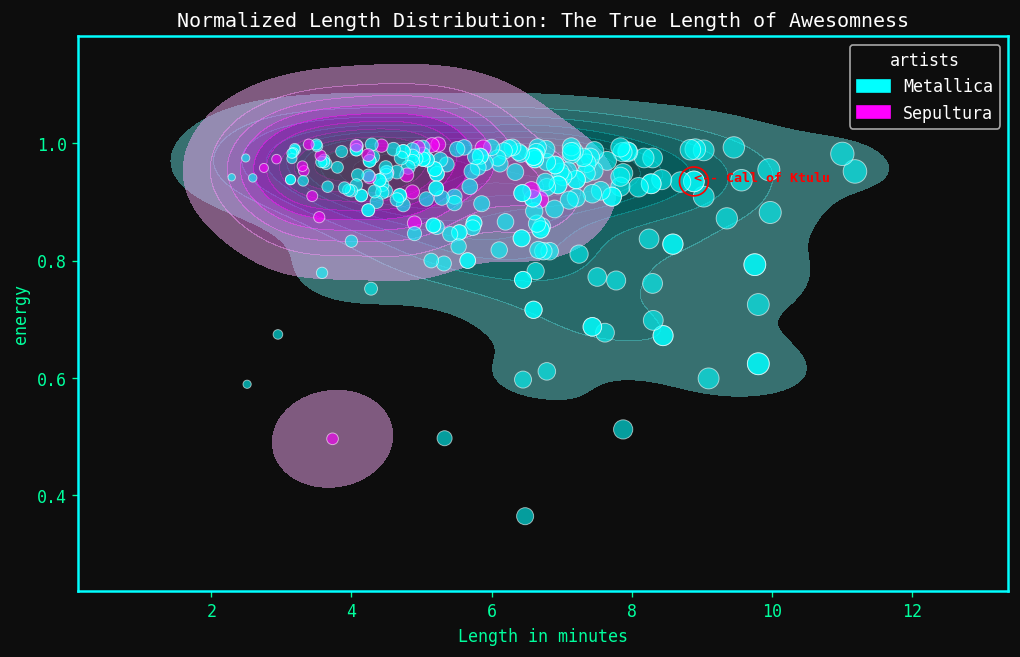

In [15]:
plt.figure(figsize=(10,6))

# common_norm=False allows the smaller band (Sepultura) to stand tall
sns.kdeplot(data=longest_tracks,
            x="minutes",
            y="energy",
            hue="artists",
            fill=True,
            common_norm=False,
            palette=neon_palette,
            alpha=0.5)

sns.scatterplot(data=longest_tracks,
               x="minutes",
               y="energy",
               hue="artists",
               palette=neon_palette,
               size="minutes",
               sizes=(20,200),
               alpha=0.6,
               legend=False)

target_song = metal_battle[metal_battle["name"].str.contains("Ktulu", case=False)].iloc[0]

x_pos = target_song["minutes"]
y_pos = target_song["energy"]

plt.text(x_pos, y_pos, "<-- Call of Ktulu", fontsize=8, color="red", weight="bold")
plt.scatter(x_pos, y_pos, s=300, facecolors="none", edgecolors="red", linewidth=1)

plt.title("Normalized Length Distribution: The True Length of Awesomness")
plt.xlabel("Length in minutes")
plt.show()

**The Logic of** .iloc[0] 🧠

This is one of the most common tripping points in Pandas, and understanding it separates the rookies from the pros.

**The Problem: The "Box" vs. The "Item"**

When you run a filter like this:
ktulu_df = metal_battle[metal_battle['name'].str.contains('Ktulu')]

Pandas returns a **DataFrame** (a spreadsheet).
Even if there is only one song that matches, Pandas still gives you a spreadsheet with one row.

* Think of it like an **Amazon delivery**:
    * You ordered a guitar pedal.
    * It arrives in a **Cardboard Box** (The DataFrame).
    * Inside the box is the **Pedal** (The Series/Row).

If you try to ask: *"What is the energy of the Cardboard Box?"*, Python gets confused. It says: "I don't know, I'm a box."

**The Solution: Open the Box**
* .iloc stands for **Integer Location**. It tells Python: "Look at the box by position number."
* [0] means: "Give me the item at position 0 (the first item)."

So, .iloc[0] is the act of **reaching into the box and pulling out the row itself**.

Once you have the row (the Series), then you can ask: "What is your energy?" (['energy']).

**Code Visualization:**
* df[...] -> Returns: [Row(Ktulu)] (A List/DataFrame)
* .iloc[0] -> Returns: Row(Ktulu) (The Object itself)
* ['minutes'] -> Returns: 8.9 (The Value)

**The Heatmap (The "Grid")** 🗺️🔥

**The Rules of the Heatmap**:

* **The Grid**: It’s a multiplication table. Every row is a variable, and every column is the same variable.
* The Score (-1 to 1):
    * +1.0 (Positive Correlation): When X goes UP, Y goes UP. (e.g., "Loudness" and "Energy"). These squares are usually Dark/Intense.
    * 0.0 (No Correlation): Random noise. No relationship. These squares are usually Light/White.
    * -1.0 (Negative Correlation): When X goes UP, Y goes DOWN. (e.g., "Acousticness" and "Energy"). These squares are usually Blue/Cool.

**The "Mirror" Effect**:
* Draw a diagonal line from top-left to bottom-right.
* The top half is a mirror image of the bottom half. You only need to read one side!

**Mission: Build Your Own Heatmap** 🛠️

Let’s adapt that anime-lover’s code to our Metal Battle.
We want to see: Does "Danceability" actually correlate with "Valence" (Happiness) in Metal?

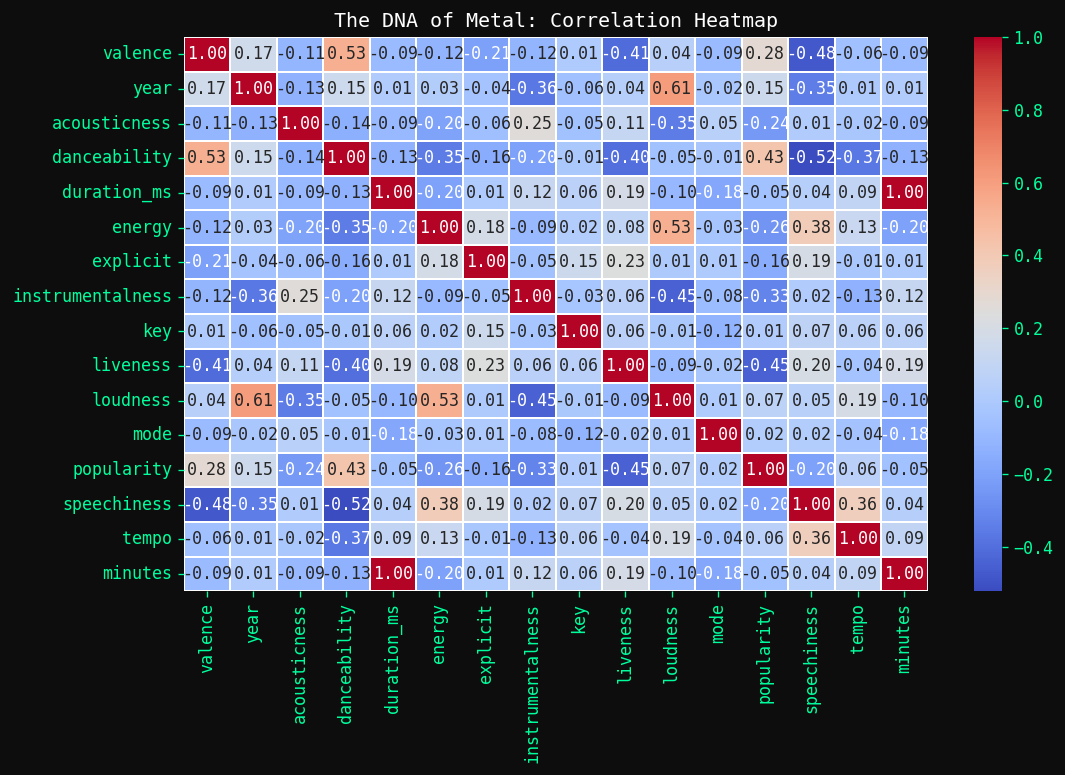

In [16]:
# 1. Select only the number columns (Math doesn't work on band names)
numeric_cols = metal_battle.select_dtypes(include=["float64", "int64"])

# 2. Calculate the Correlation Matrix (The Math)
correlation = numeric_cols.corr()

# 3. Plot the Heatmap (The Art)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidth=0.2)

plt.title("The DNA of Metal: Correlation Heatmap")
plt.show()


**Step 1: The "Bouncer" (select_dtypes)** 🚪🚫

numeric_cols = metal_battle.select_dtypes(include=["float64", "int64"])

**Concept**: The V.I.P. Rope.

Imagine you have a party (your DataFrame).
* **Guests**: Some are Numbers (Energy, Loudness, Year).
* **Guests**: Some are Words (Band Name, Song Title).

You want to play a game called "Math."
* If you try to multiply "Metallica" by "Sepultura," the game crashes.
* So, you hire a **Bouncer** (select_dtypes).

**The Command**:
"Check everyone's ID. If their ID says float64 (Decimal Number) or int64 (Whole Number), let them in. If their ID says object (String/Text), kick them out."

**The Result** (numeric_cols):
A clean, new room containing only the guests who can do math. The band names are gone, leaving just the raw data skeleton.

**Step 2: The "Interrogation Room"** (.corr()) 🕵️‍♂️💡

correlation = numeric_cols.corr()

**Concept**: The Speed Dating Event.

Now that you have a room full of numbers, .corr() forces every single variable to go on a date with **every other variable** to see if they have chemistry.

It asks a simple question to every pair:
"When YOU change, how does HE change?"

**The Calculation (Pearson Correlation)**:

It draws a line through the data points of the two variables.
* Positive (0 to 1): "When Year goes UP, Loudness goes UP." (They are friends).
* Negative (-1 to 0): "When Energy goes UP, Acousticness goes DOWN." (They are enemies).
* Zero (0): "When Duration changes, Danceability does random stuff." (They are strangers).
  
**The Output (The Matrix)**:

It returns a square table (the Heatmap grid) where every cell is the "Chemistry Score" between those two variables.

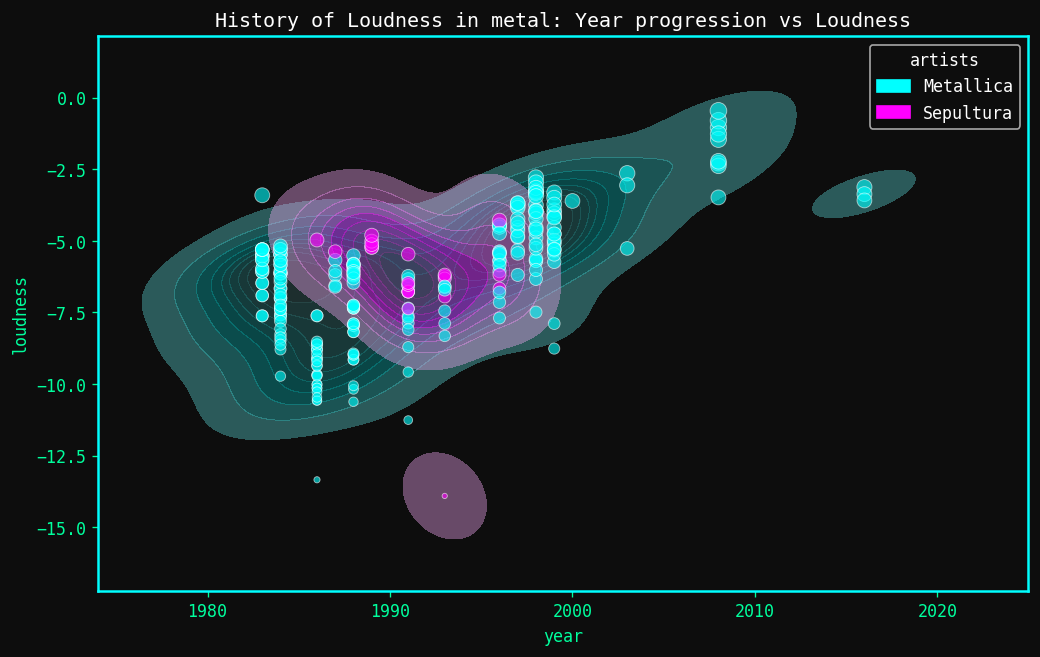

In [17]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=metal_battle,
            x="year",
            y="loudness",
            hue="artists",
            fill=True,
            common_norm=False,
            palette=neon_palette,
            alpha=0.4)

sns.scatterplot(data=metal_battle,
                x="year",
                y="loudness",
                hue="artists",
                palette=neon_palette,
                size="loudness",
                sizes=(10, 100),
                alpha=0.6,
                legend=False)

plt.title("History of Loudness in metal: Year progression vs Loudness")
plt.show()

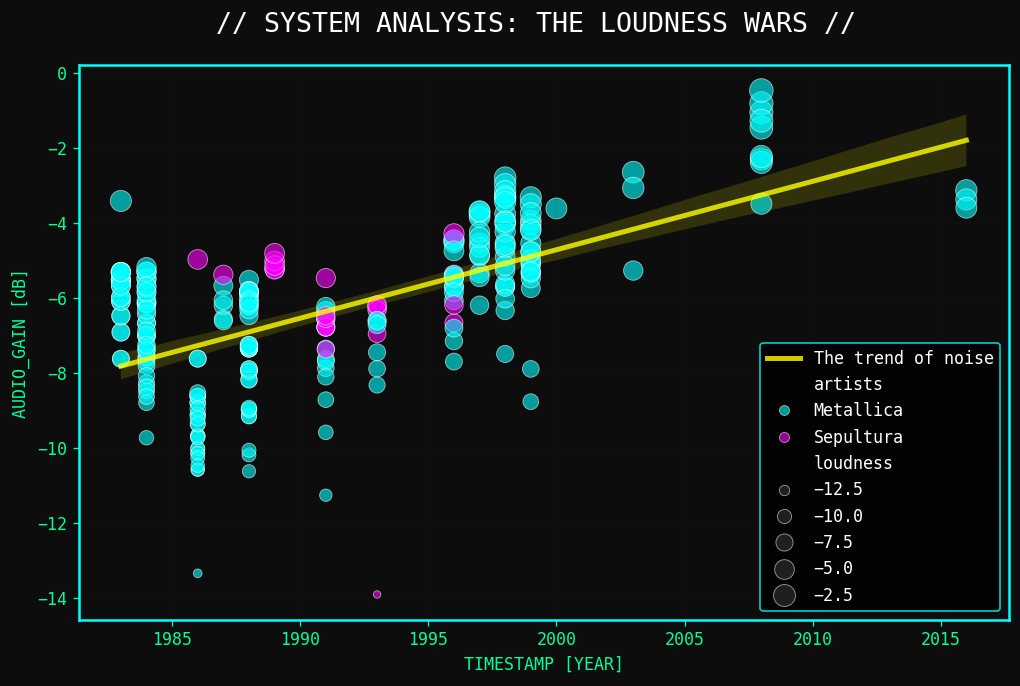

In [18]:
plt.figure(figsize=(10,6))

# Plot the trend line
sns.regplot(data=metal_battle,
            x="year",
            y="loudness",
            scatter=False,
            color="#FFFF00",
            line_kws={"linewidth": 3, "alpha": 0.8},
            label="The trend of noise")
sns.scatterplot(data=metal_battle,
               x="year",
               y="loudness",
               hue="artists",
               size="loudness",
               sizes=(20, 200),
               palette=neon_palette,
               alpha=0.6,
               edgecolor="white",
               linewidth=0.5)
plt.title("// SYSTEM ANALYSIS: THE LOUDNESS WARS // ", fontsize=16, pad=20)
plt.xlabel("TIMESTAMP [YEAR]")
plt.ylabel("AUDIO_GAIN [dB]")
plt.grid(True, alpha=0.2, linestyle="--")
plt.legend(frameon=True, facecolor="black", edgecolor="#00ffff")
plt.show()

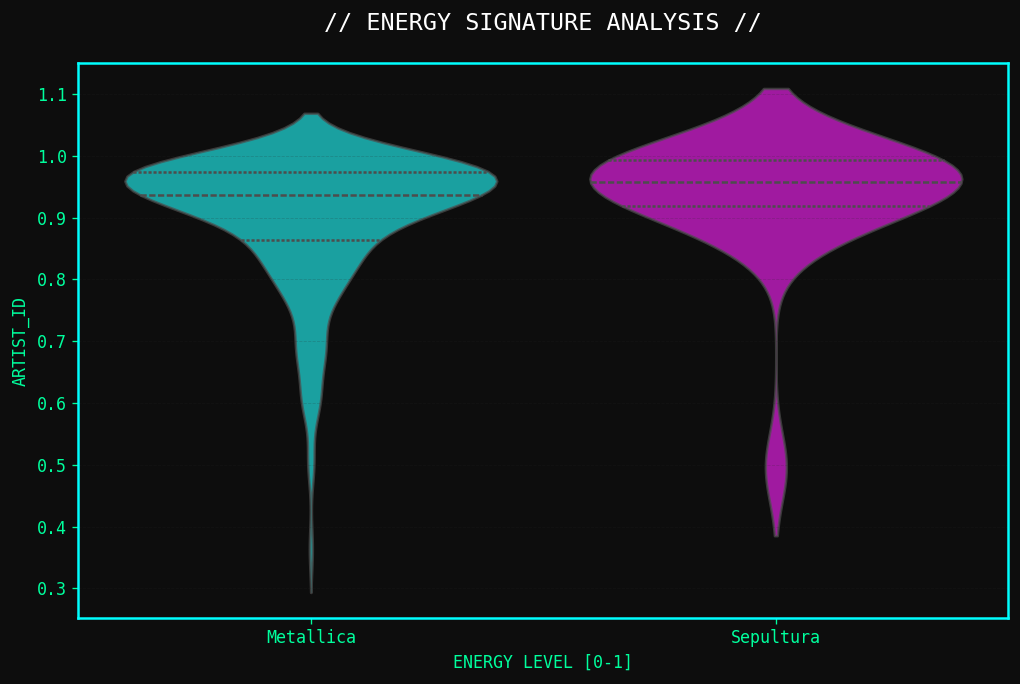

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(data=metal_battle,
              x="artists",
              y="energy",
              hue="artists",
              palette=neon_palette,   # Cyan/Magenta
              inner="quartile",       # Draws the lines inside
              linewidth=1.5,
              alpha=0.7)

plt.title("// ENERGY SIGNATURE ANALYSIS //", fontsize=14, pad=20)
plt.xlabel("ENERGY LEVEL [0-1]")
plt.ylabel("ARTIST_ID")
plt.grid(True, axis="y", alpha=0.2, linestyle="--")
plt.show()

# 🏁 MISSION DEBRIEF: METALLICA VS. SEPULTURA

### 1. The Energy Signature ⚡
- **Sepultura:** Consistent, high-energy aggression. A focused laser beam of thrash.
- **Metallica:** A wide spectrum. From acoustic ballads to heavy riffs. They are an empire, not just a band.

### 2. The Loudness War 🔊
- **Confirmed:** The regression line shows a clear upward trend in volume over time.
- **The "Death Magnetic" Era:** We visually identified the brick-walling of the late 2000s.

### 3. The "Cyberpunk" Aesthetic 🌃
- We successfully deployed a custom `matplotlib` theme.
- Dark mode saved the Commander's eyes.
- Neon colors improved pattern recognition (and looked cool).

### 4. Final Verdict 👨‍⚖️
- **Sepultura** wins on **Consistency**.
- **Metallica** wins on **Scope** and **History**.
- **The Commander** wins for building this analysis on a Sunday.

# 🔮 Phase 3: The machine learning Oracle
### Mission: Teach the machine to distinguish Sepultura from Metallica.

**Concept 1: The "University" Split (train_test_split)** 🎓

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**train_test_split()** - this is essentialy a tuple with **4 elements** that are put into **X_train, X_test, y_train, y_test** - the order matters!

**The Logic**:
Imagine you are teaching a student (the Model) to identify "Thrash Metal."
You have 100 songs.
* **Option A**: You show them all 100 songs, teach them, and then test them on the same 100 songs.
    * Result: They get 100%. They didn't learn; they just memorized. (This is called Overfitting).
* **Option B (The Data Science Way)**: You hide 20 songs in a vault (X_test). You teach them using only the other 80 (X_train). Then, for the final exam, you unlock the vault and ask: "What are these?"
    * test_size=0.2: "Hide 20% of the data."
    * random_state=42: This is the "God Mode" seed. Computers aren't truly random. By setting this to 42, we ensure that every time we split the deck, we get the exact same random shuffle. (So you and I get the same result).

**The "Card Dealer" Analogy** ♠️♥️♣️♦️

Imagine train_test_split is a **Dealer** at a poker table.
It holds a deck of data.

**1.** **The Function Runs**: train_test_split(X, y) shuffles the deck and cuts it into 4 specific piles.
* Pile 1: Questions to Study (X_train)
* Pile 2: Questions for Exam (X_test)
* Pile 3: Answers to Study (y_train)
* Pile 4: Answers for Exam (y_test)
  
**2.** **The Return**: The function returns ALL 4 PILES wrapped up in one big package (a List).
* It looks like this behind the scenes: [Pile1, Pile2, Pile3, Pile4]

**3.** **The Unpacking (The Left Side)**:

When you write:
a, b, c, d = ...

Python sees the list on the right and says:
* "Okay, I have 4 items in the bag."
* "I have 4 variables on the left."
* "I will give the 1st item to a."
* "I will give the 2nd item to b."
* "I will give the 3rd item to c."
* "I will give the 4th item to d."

**The "Anatomy" of the Name** 🦴

Let's break down X_train and y_test.

**1.** **The Capital X vs. Lowercase y**
* **X (Capital)**: This represents the DATA (the spreadsheet columns: Energy, Loudness, Year). It is capital because it's a "Matrix" (big rectangle of numbers).
    * **Analogy**: The Questions on the exam.
* **y (Lowercase)**: This represents the TARGET (the answer column: "Metallica" or "Sepultura"). It is lowercase because it's usually a "Vector" (a single list).
    * **Analogy**: The Answer Key.
 
**2.** **The** *_train* **vs**. *_test*
* _train: This is the pile of data the model is allowed to STUDY.
* _test: This is the pile of data the model must GUESS later.

**The "Exam" Analogy (The Click Moment)**
💡
Imagine you are a teacher (The Programmer) teaching a student (The Model).
* X_train: You hand the student a practice test with 80 questions.
* y_train: You hand them the answer key for those 80 questions.
    * Instruction: "Study these. Learn how the questions relate to the answers."
* X_test: Final Exam day! You hand the student 20 new questions.
    * Crucial: You HIDE the answer key (y_test).
* y_pred (Predictions): The student fills out the test and hands it back.
* y_test: Now, you pull the real answer key out of your pocket and compare it to their answers (y_pred) to give them a grade.

**Concept 2: The "Line in the Sand" (LogisticRegression)** ➖

model = LogisticRegression()

**The Logic**:

Despite the name, this isn't "Regression" (predicting a number like price). It's Classification (predicting a Label like Yes/No).

Imagine plotting every song on a graph:
- X-axis: Loudness
- Y-axis: Energy
- Dots: Blue for Metallica, Red for Sepultura.

**What the Model does**:

It tries to draw a straight line through the graph that best separates the Blue dots from the Red dots.

* Anything above the line = Sepultura.
* Anything below the line = Metallica.
It doesn't just guess; it calculates the Probability (0 to 1).
* "I am 95% sure this is Sepultura." -> Label: 1
* "I am 51% sure this is Sepultura." -> Label: 1 (But barely).

Concept 3: The "Gym" (.fit()) 🏋️‍♂️

model.fit(X_train, y_train)

**The Logic**:

This is the **Training Phase**.
The computer looks at the data and adjusts its internal "dials" (Coefficients).
* Attempt 1: "If it's loud, it's Sepultura." -> (Checks answers) -> "Wrong. Metallica is loud too."
* Attempt 2: "If it's loud AND fast, it's Sepultura." -> (Checks answers) -> "Better."
* Attempt 3: "If it's loud, fast, and has low valence..." -> "Perfect."

It does this thousands of times in a split second until it minimizes its mistakes.

**Concept 4: The "Final Exam" (.predict())** 📝

predictions = model.predict(X_test)

**The Logic**:
Now we take away the answer key.

We give the model the **Test Questions** (X_test - just the numbers).

We ask: "Who is this?"

The model uses the rules it learned in the Gym to guess the label.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Prepare the Data (The "X" and the "y")
# X = The Features (The clues: Energy, Loudness, Danceability, etc.)
# y = The Target (The answer: The Band Name)
# ***numeric_cols*** variable created for the Heatmap way back in this project.
X = numeric_cols.drop(['year'], axis=1) # We drop 'year' to make it fair (style over time)
y = metal_battle['artists']

# 2. Split the Reality (Training vs. Testing)
# We hide 20% of the data to test the machine later.
# random_state=42 is the "Seed of the Universe" (keeps the split consistent)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Oracle (The Model)
model = LogisticRegression(random_state=42, max_iter=3000)

# 4. Train the Beast (The "Fit" Command)
# This is where the learning happens. It studies the X_train to predict y_train.
model.fit(X_train, y_train)

# 5. The Moment of Truth (Prediction)
# We ask the model to predict the bands for the hidden 20% (X_test)
predictions = model.predict(X_test)

# 6. Check the Score
# Did it guess right?
accuracy = accuracy_score(y_test, predictions)

print(f"🔮 ORACLE ACCURACY: {accuracy * 100:.2f}%")

🔮 ORACLE ACCURACY: 90.20%


**Step 1: The Extraction & Assembly** 📦

We need to create a DataFrame called dna.
* **Column A ("Feature")**: Needs the column names from your X variable.
* **Column B ("Importance")**: Needs the coefficients from model.coef_[0].
    * **Note**: We use [0] because scikit-learn stores coefficients as a list of lists (just in case there are multiple classes), but we only have one boundary.

In [21]:
# COMMANDER'S CODE BLOCK 1: DATA PREP

# 1. Create a dictionary or straight into DataFrame
# Hint: keys should be 'Feature' and 'Importance'
# Values come from X.columns and model.coef_[0]
dna = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
})
dna_sorted = dna.sort_values(by="Importance", ascending=False)

print(dna_sorted)

             Feature  Importance
5           explicit    1.054262
10              mode    0.525366
12       speechiness    0.332898
4             energy    0.261470
7                key    0.134478
11        popularity    0.050481
14           minutes    0.004261
3        duration_ms   -0.000015
13             tempo   -0.009333
9           loudness   -0.126072
2       danceability   -0.329488
1       acousticness   -0.331988
6   instrumentalness   -0.871895
8           liveness   -0.878387
0            valence   -1.520891


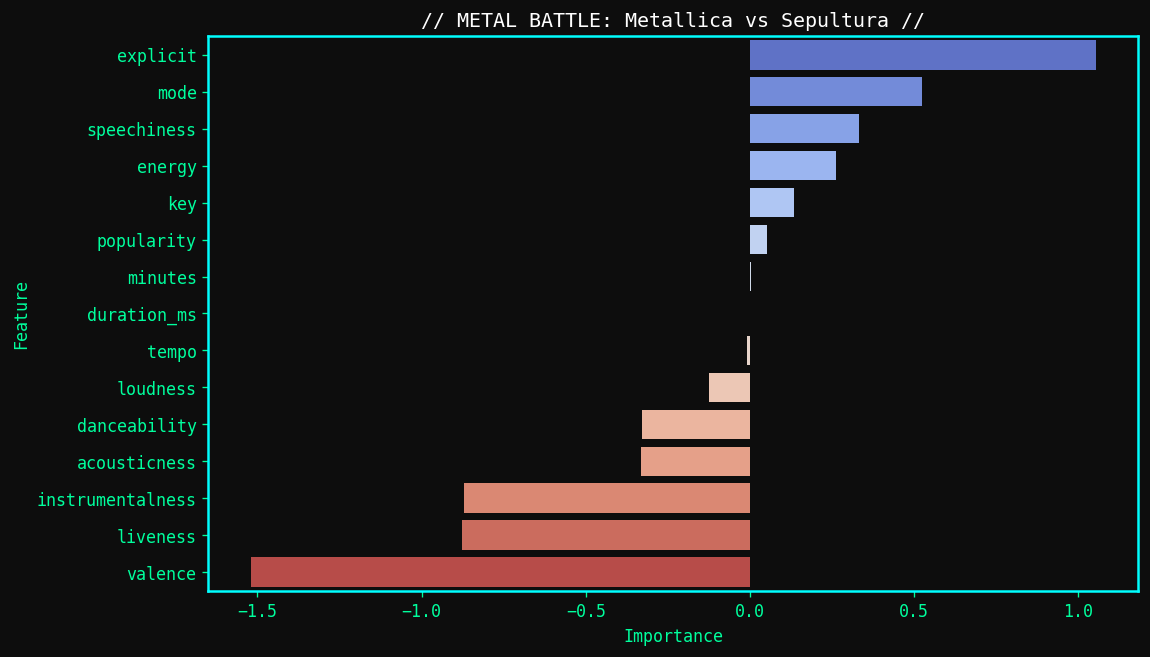

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=dna_sorted,
           x="Importance",
           y="Feature",
           palette="coolwarm",
           hue="Feature",
           legend=False
           )
plt.title("// METAL BATTLE: Metallica vs Sepultura //")

plt.show()

In [23]:
# Ask the model: "What order are the classes in?"
print(f"The Classes are: {model.classes_}")

# It will print: ['Metallica' 'Sepultura']
# Index 0 = Metallica
# Index 1 = Sepultura

The Classes are: ['Metallica' 'Sepultura']


**Decoding Your Graph**:

* The "Explicit" Bar (Top / Positive):
    * This bar is shooting UP (or Right, depending on orientation).
    * **Meaning**: If a song has "Explicit" lyrics, the model screams: "THIS IS SEPULTURA!"
    * Real World Check: Sepultura is heavier, thrashier, and angrier. Metallica (especially the radio hits) is cleaner. The machine found the swear words.

**The "Valence" Bar (Bottom / Negative)**:
* This bar is shooting DOWN (or Left).
    * **Meaning**: If a song has High Valence (Happy/Major Key), the model screams: "**THIS IS METALLICA!**"
    * Wait, what? Metallica is "happy"?
    * **Correction**: Compared to Sepultura (Death/Groove Metal), Metallica has ballads ("Nothing Else Matters"), major key riffs ("Enter Sandman"), and melodic solos. To a computer, that looks "happier" (Higher Valence) than Sepultura's pure aggression.

**The Missing "Decoder Ring"** 💍🔑

Here is the secret rule that scikit-learn uses by default (and why you couldn't see it):
**Alphabetical Order**.

* **Class 0 (Negative/Left)**: Metallica (Comes first in ABC).
* **Class 1 (Positive/Right)**: Sepultura (Comes second).
  
So, essentially:
* **Positive Bars (+)**: "This feature makes it Sepultura."
* **Negative Bars (-)**: "This feature makes it Metallica."

**The "Alphabetical Sorting Hat" Explained** 🎩✨
You asked: "Why is (+) Sepultura and (-) Metallica? Where is it coming from?"

It comes from the most boring rule in programming: **The Dictionary**.
Scikit-learn is lazy. It doesn't know that "Metallica" is a band or that "Sepultura" is heavier. It just sees text strings.

**The Algorithm**:
* It finds all unique labels: ['Sepultura', 'Metallica'].
* It sorts them Alphabetically: ['Metallica', 'Sepultura'].
* It assigns them ID numbers based on that order:
    * Metallica = 0 (The "Negative" or "Reference" Class)
    * Sepultura = 1 (The "Positive" or "Target" Class)
    * 
**The "Probability" Question**:
When the model runs, it is technically asking **one** specific question:

*"What is the probability that this song belongs to Class 1 (Sepultura)?"*

* **If the math adds up to a HIGH number (Positive +)**:
"Probability is High. This looks like Sepultura."
(The coefficient pushes the score UP).
* **If the math adds up to a LOW number (Negative -)**:
"Probability is Low. This looks like the other one (Metallica)."
(The coefficient pushes the score DOWN).

**Why this matters**:
If we were analyzing **"Anthrax"** vs. **"Metallica"**:
* Alphabetical Sort: ['Anthrax', 'Metallica'].
* Anthrax = 0, Metallica = 1.
* Suddenly, Metallica would be the "Positive" (+) class!

**So, the "Signs" (+/-) are not about the music**. They are about where the band name sits in the dictionary.

**1. The "Default" vs. The "Target"** 🎯
You said: "It takes Class 0... and compares it to the target Class 1."

**Spot on**.

In Logistic Regression, the model always asks a specific question:

**"What is the probability that this song is SEPULTURA (Class 1)?"**
* It does not ask: "Is this Metallica?"
* It assumes Metallica (Class 0) is the "Baseline" or "Reference."

**2. The "Seesaw" Analogy (Your Intuition Visualized)** ⚖️

Imagine a balance scale (seesaw).
* **The Left Side (Ground)**: 0% Probability (Pure Metallica).
* **The Right Side (Sky)**: 100% Probability (Pure Sepultura).
* **The Middle**: 50% (I have no idea).

**How the Coefficients Work**:
* Positive (+) Features: "This pushes the seesaw UP towards the Sky (Sepultura)."
    * Example: Explicit Lyrics (+2.5 weight).
* Negative (-) Features: "This pushes the seesaw DOWN towards the Ground (Metallica)."
    * Example: Acousticness (-1.8 weight).
 
**3. The Only Correction: It learns both at once** 🤝

You said: "If the new data does not seem like Class 1... it puts it into negative."

**Correct**.
If the math adds up to a negative number (e.g., -5), the model says:

*"The probability of this being Sepultura is 0.01%."*
*"Therefore, I predict it is Metallica."*

**The "Learning" Part**:

It doesn't learn Metallica first. It looks at both piles of songs (Red and Blue) at the same time and tries to draw a Line between them.
* "If I draw the line here, I get 5 wrongs."
* "If I draw it there, I get 2 wrongs."
* "Okay, this is the perfect line."

**Summary for your Mental Model** 🧠
* **Class 0 (Metallica)**: The "Floor."
* **Class 1 (Sepultura)**: The "Ceiling."

**The Coefficients: Gravity.**
* **(+)** lifts you to the ceiling.
* **(-)** pulls you to the floor.

**Status: Decoding the "Matrix Code."** 🕵️‍♂️🔢

You are asking the million-dollar question. In Machine Learning, "Coefficient" is a fancy word for **Multiplier** (or Weight).

Think of it this way:
You are not just giving the computer data. You are giving it a **Mixing Console**.

**1. The Analogy: The Mixing Console** 🎚️🎛️
Imagine you are a DJ trying to mix a track that sounds like Sepultura.
You have a row of faders (sliders) in front of you. Each fader controls one feature.

* **Fader 1 (Loudness)**: Pushed all the way UP (+3.5).
    * Effect: "If it's loud, it sounds A LOT like Sepultura."
* **Fader 2 (Acousticness)**: Pulled all the way DOWN (-2.0).
    * Effect: "If it's acoustic, it definitely does NOT sound like Sepultura (so it must be Metallica)."
* **Fader 3 (Danceability)**: Middle (0.1).
    * Effect: "Doesn't really matter. Leave it alone."

**The Coefficient IS the position of the fader.**

**2. The Math (Simplified)** 🧮

Remember high school algebra?

$$y = mx + b$$

* $y$ = The Answer (Is it Sepultura?)
* $x$ = The Input (The Loudness value)
* $m$ = **The Coefficient** (The Slope/Multiplier)

**Inside the Model's Brain:**

It calculates a "Score" for every song like this:

$$Score = (Loudness \times 3.5) + (Acousticness \times -2.0) + (Danceability \times 0.1)$$

* If the total Score is **High Positive**, it predicts **Sepultura**.
* If the total Score is **High Negative**, it predicts **Metallica**.

**3. The "Sign & Size" Rule** 📏

When you look at your graph:
* **The Sign (+ or -)**: Tells you the **TEAM**.
    * **Positive (+)**: Team Sepultura.
    * **Negative (-)**: Team Metallica.
* The Size (The Number): Tells you the POWER.
    * **Coefficient = 0.01**: Weak. The model barely cares. (Like a whisper).
    * **Coefficient = 5.0**: Massive. This is the "Smoking Gun." (Like a scream).

**Summary**:
The Coefficient tells you: "How much should I multiply this number by to guess the right band?"


# **Phase 3: The Filter (Cleaning the Signal)** 🧹✨

We are going to remove the "Live", "Remaster", and "Deluxe" tracks to give our Oracle pure studio data.

### **The Mission**:

Create a new dataframe called studio_tracks that excludes rows where the song name contains specific keywords.

**Your Conceptual Toolkit**: 🧰

* **String Matching** (.str.contains):
    * Pandas has a superpower to search text columns.
    * Syntax: df['column'].str.contains('Pattern', case=False)
    * Note: The | symbol means "OR" in Regex (Regular Expressions). So 'Live|Demo' means "Live OR Demo".
* **The "NOT" Operator (~)**:
    * In Python data science, the tilde ~ means "The Opposite Of".
    * If mask finds all the Live tracks...
    * ~mask gives you everything that is NOT a Live track.

🛡️ **N7 Mission: Write the Filter**

I want you to write the code to create the clean dataset.

**Step 1: Define the Enemy**
Create a variable (let's call it mask) that finds the bad rows.
* Target the 'name' column of metal_battle.
* Search for: 'Live|Remaster|Deluxe|Demo' (case insensitive).

**Step 2: Execute the Filter**
Create a new dataframe called studio_tracks.
* Select from metal_battle.
* Use the ~mask inside the selection brackets [] to keep only the "Good" rows.

**Step 3: Verify the Kill**
* Print the length of the old metal_battle.
* Print the length of the new studio_tracks.
* (Optional) Print studio_tracks['name'].head() to see if they look clean.

In [ ]:
mask = metal_battle["name"].str.contains(r"Live|Remaster|Deluxe|Demo", case=False)
studio_tracks = metal_battle[~mask]

display(studio_tracks["artists"].value_counts())
display(studio_tracks[["artists", "name", "year", "release_date"]].sort_values(by="year", ascending=True).head(10))

### **Phase 3.5: The Rematch** 🥊🤖

We have a new, cleaner dataset called studio_tracks.
We need to see if the Oracle is smarter now.

**Your Mission**:
Retrain the model from scratch using **ONLY** the studio_tracks.

**Step 1: Define the New Reality**

Create new X and y variables.

* **Important**: Do not use metal_battle. You must use studio_tracks.
* X: Select number columns, drop 'year'.
* y: The 'artists' column.

**Step 2: The Split**

Run train_test_split again.
* (Tip: You can use random_state=42 again to keep it consistent).

**Step 3: Train & Score**
* Initialize LogisticRegression (remember max_iter=3000).
* Fit it.
* Print the new Accuracy.

In [ ]:
X02 = studio_tracks.select_dtypes(include=["float64", "int64"]).drop(["year"], axis=1)
y02 = studio_tracks["artists"]

X02_train, X02_test, y02_train, y02_test = train_test_split(X02, y02, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=3000)
model.fit(X02_train, y02_train)

predictions = model.predict(X02_test)

accuracy = accuracy_score(y02_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
cm = confusion_matrix(y02_test, predictions, labels=model.classes_)

plt.figure(figsize=(10,6))
sns.heatmap(data=cm,                      # Data confusion matrix
           annot=True,                    # Write the numbers in the boxes
           fmt="d",                       # Format as integers (no decimals)
           cmap="Blues",                  # Blue color scheme
           xticklabels=model.classes_,     # Label the X axis
           yticklabels=model.classes_)     # Label the Y axis

plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("The Oracle\'s Confusion Matrix")
plt.show()

**The "Map" of the Matrix** 🗺️

The grid is always organized like this:
* **Rows (Side)**: The **TRUTH** (Actual Band).
* **Columns (Bottom)**: The **GUESS** (Predicted Band).
Since **Metallica = 0** and **Sepultura = 1**, here is your grid:

In [ ]:
#                             Predicted: Metallica (0)         Predicted: Sepultura (1)
# Actual: Metallica (0)       15 (Correct!)                    1 (False Alarm)
# Actual: Sepultura (1)       2 (Missed Target)                3 (Direct Hit)

**The Conceptual Explanation of the Numbers** 🔢

**1. The "15" (Top Left): The Safe Zone** ✅
* **What happened**: There were 15 Metallica songs. The model listened to them and correctly said, "This is Metallica."
* **Meaning**: Your model is excellent at identifying Metallica. It almost never mistakes them for someone else.

**2. The "1" (Top Right): The False Alarm** 🚨
* **What happened**: There was 1 Metallica song that was so heavy, fast, or angry that the model screamed "SEPULTURA!"
* **Meaning**: This is a False Positive. It's rare (only 1 song), which means your model is not "trigger happy." It doesn't cry wolf often.

**3. The "2" (Bottom Left): The Stealth Miss** 👻
* What happened* : There were 2 Sepultura songs that the model failed to spot. It thought they were Metallica.
* Meaning: This is a False Negative.
* Why? Maybe these Sepultura songs were slower or quieter than usual. The model played it safe and guessed the "default" (Metallica).

**4. The "3" (Bottom Right): The Kill** 🎯
* What happened: There were 3 Sepultura songs that the model correctly identified.
* Meaning: These are the True Positives.

**The "Story" of Your Model** 📖

**Total Test Songs**: 21 (15 + 1 + 2 + 3)
* Metallica Songs: 16 (15 correct, 1 wrong). 94% Accuracy.
* Sepultura Songs: 5 (3 correct, 2 wrong). 60% Accuracy.

**The Verdict**:

Your model is like a security guard who knows the residents (Metallica) very well but is struggling to recognize the new visitors (Sepultura).
* It is Conservative. It prefers to guess "Metallica" when it isn't sure.
* It is Starving. It only saw 5 Sepultura songs in the test. Missing just 2 of them ruined its score.

**The Code Explanation** 💻

* confusion_matrix(y_true, y_pred):
    * This is the **Referee**.
    * It takes the Answer Key (y02_test) in one hand and the Student's Answers (predictions) in the other.
    * It counts the matches and mismatches and sorts them into the 4 piles (buckets) we just discussed.
* sns.heatmap(...):
    * This is just the **Painter**.
    * Without this, you would just get a boring text array [[15, 1], [2, 3]].
    * The heatmap colors the boxes so you can instantly see: "Wow, the Top-Left box is dark blue (Huge number), and the others are light (Small numbers)."

**1. The "Hungry Student" Principle** 🍎📚

Imagine you have a student (the Model) trying to learn a completely new language (Sepultura vs. Metallica).
You have a textbook with **100 pages**.

* **Scenario A (80/20 Split)**:
    * **Study**: You let the student read 80 pages. They see thousands of examples of grammar, vocabulary, and exceptions.
    * **Test**: You test them on the last 20 pages.
    * **Result**: The student is smart. They learned the rules well. The test is short, but they likely pass with a high score.
* **Scenario B (50/50 Split)**:
    * **Study**: You rip the book in half. The student only gets 50 pages to learn from.
    * **Test**: You test them on the other 50 pages.
    * **Result**: The student is "Dumber." They missed half the vocabulary. They might encounter a rule in the test that was only explained on page 75 (which you threw away). They fail the test, not because the test was hard, but because they were under-prepared.

**Key Concept**:

Machine Learning models are "Data Hungry."
The more data they see during training, the smarter they get.
If you starve them (by making the test set too big), they never learn the patterns in the first place.

**2. The "Sepultura Danger Zone"** ⚠️🎸

In your specific case (Post-Purge), a 50/50 split would be catastrophic.

Let's look at the math for **Sepultura** (Total: 23 songs).

* **Current (80/20)**:
    * **Training**: It sees ~**18** Sepultura songs. (Okay, it can find a pattern).
    * **Testing**: It tests on ~**5** songs.
* **Hypothetical (50/50)**:
    * **Training**: It sees ~**11** Sepultura songs. 🚨
    * **Testing**: It tests on ~**12** songs.

**The Risk**:

With only 11 examples, the model might think: "Oh, Sepultura is just that one band that uses acoustic guitars sometimes."
It missed the 12 other songs that show Sepultura uses heavy drums.

**You made the test "fairer" (larger), but you made the student incompetent.**

**3. The Trade-Off Visualized** ⚖️

* **Tiny Test Set (e.g., 5%)**:

    * **Model**: Very Smart (Saw almost everything).

    * **Score**: Unreliable. (If it gets 1 wrong, the score drops huge).

* **Huge Test Set (e.g., 50%)**:

    * **Model**: Very Dumb (Barely learned anything).

    * **Score**: Very Stable (lots of test questions), but likely Low.

**The Goldilocks Zone:**

That is why Data Scientists almost always stick to **0.2 (20%)** or **0.25 (25%)**.
It gives the model enough "food" to grow strong, while keeping just enough "exams" to prove it works.